# Iris-flower-classification project!!!

### Problem : 
  Classifying and training a machine learning model that can learn from the measurements of the Iris species.

### Data :
The data can abe found on Kaggle with the same name.

### Features :
1. Sepal Length: The length of the iris flower’s sepals (the green leaf-like structures that encase the flower bud).
2. Sepal Width: The width of the iris flower’s sepals.
3. Petal Length: The length of the iris flower’s petals (the colored structures of the flower).
4. Petal Width: The width of the iris flower’s petals.

The target column :
The target variable represents the species of the iris flower and has three classes: Iris setosa, Iris versicolor, and Iris virginica.

1. Iris setosa: Characterized by its relatively small size, with distinctive characteristics in sepal and petal dimensions.
2. Iris versicolor: Moderate in size, with features falling between those of Iris setosa and Iris virginica.
3. Iris virginica: Generally larger in size, with notable differences in sepal and petal dimensions compared to the other two species.

### Model building :
We will use several models like RandomForestClassifier, LogisticRegression, KNeighboursClassifier.

### Evaluation metric : 
Since it is a classification problem, we will be using Accuracy as the evaluation metric.

### Preparing the tools needed

In [1]:
#importing all the EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import log_loss

In [2]:
#load the data
iris_data = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\iris dataset.csv", index_col=0)

In [3]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


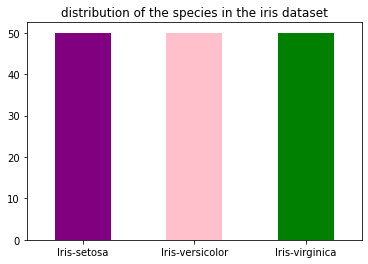

In [6]:
#Let's check the distribution of the target (species) variable
iris_data["Species"].value_counts().plot(kind = "bar", color =["purple","pink","green"])
plt.xticks(rotation =0)
plt.title("distribution of the species in the iris dataset")
plt.show()

#### here, we can see that all the three species have equal distribution

In [7]:
len(iris_data)

150

In [8]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


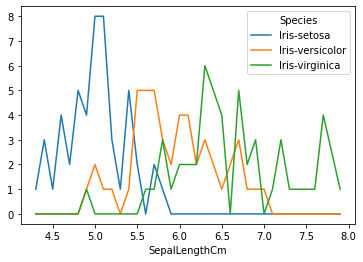

In [9]:
#let's compare the sepal length to the species
pd.crosstab(iris_data["SepalLengthCm"], iris_data["Species"]).plot();

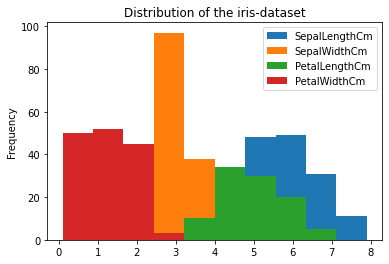

In [10]:
#check the overall distribution of the dataset
iris_data.plot(kind = "hist")
plt.title("Distribution of the iris-dataset");

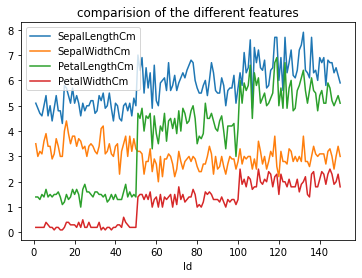

In [11]:
iris_data.plot()
plt.title("comparision of the different features");

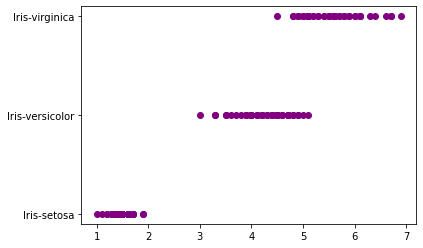

In [12]:
plt.scatter(x = iris_data["PetalLengthCm"], y =iris_data["Species"], color = "purple");

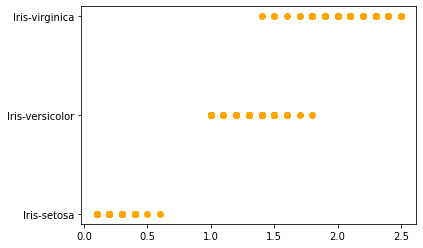

In [13]:
plt.scatter(x = iris_data["PetalWidthCm"], y=iris_data["Species"], color = "orange");

In [14]:
#correlation matrix 
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


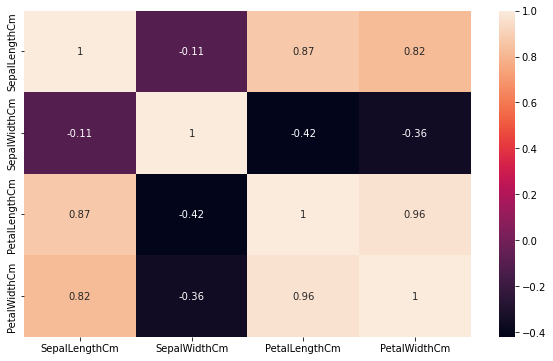

In [15]:
#heatmap of the correlation matrix 
plt.figure(figsize =(10,6))
sns.heatmap(data=iris_data.corr(), annot=True)
plt.xticks(rotation = 0);

In [16]:
#check the dtypes
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [17]:
#check for missing values
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Since there are no missing values, we can start the modelling :)

# Modelling

In [19]:
#split the data into feature (x) and target (y) variables
x = iris_data.drop("Species", axis =1)
y = iris_data["Species"]

In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [21]:
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [22]:
#check the dtypes
x.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [23]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [24]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## since the target variable has a dtype of object let's convert it into numerical form before we start the modelling the data

In [25]:
#using the map function to convert the target variable to numerical
transformed_y = y.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [26]:
transformed_y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [27]:
#split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, transformed_y, test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test)

(120, 120, 30, 30)

In [28]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed 
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [29]:
fit_and_score(models, x_train, x_test, y_train, y_test)

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

#### We got a 100% Accuracy on all the three models. Usually we could do a hyperparameter tuning if the model did not achieve a good score and sometimes it's also not right to get a 100% accuracy but since this is a small dataset, it is totally okay for it to have a 1.0 score :)

In [30]:
#now make predictions with the trained models
models

{'KNN': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier()}

In [31]:
#let's use a logistic regression model for the prediction
y_preds = models["Logistic Regression"].predict(x_test)

In [32]:
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [33]:
y_test 

Id
74     1
19     0
119    2
79     1
77     1
32     0
65     1
142    2
69     1
83     1
111    2
13     0
37     0
10     0
20     0
57     1
105    2
70     1
56     1
133    2
30     0
128    2
27     0
129    2
132    2
146    2
109    2
144    2
46     0
31     0
Name: Species, dtype: int64